In [8]:
'''>>>>> start CodeP3.2.1F21
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import math 
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables - add your values here
#Tamed = 10  #make sure Tamed does not = 0
##IDmed = 600
#RLmed = 27.45

#create input data array
xdata = []

#Part 1 input data: Mode number, Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = [[0., 10.0, 200.0, 24.3], 
 [1., 10.0, 200.0, 24.3], 
 [2., 10.0, 200.0, 24.3], 
 [0., 10.0, 200.0, 51.8], 
 [1., 10.0, 200.0, 51.8],
         
 [2., 10.0, 200.0, 51.8], 
 [0., 10.0, 200.0, 96.2], 
 [1., 10.0, 200.0, 96.2], 
 [2., 10.0, 200.0, 96.2], 
 [0., 10.0, 200.0, 170.1],
         
 [1., 10.0, 200.0, 170.1], 
 [2., 10.0, 200.0, 170.1], 
 [0., 10.0, 500.0, 7.0], 
 [1., 10.0, 500.0, 7.0], 
 [2., 10.0, 500.0, 7.0], 
         
 [0., 10.0, 500.0, 21.2], 
 [1., 10.0, 500.0, 21.2], 
 [2., 10.0, 500.0, 21.2], 
 [0., 10.0, 500.0, 43.2], 
 [1., 10.0, 500.0, 43.2], 
         
 [2., 10.0, 500.0, 43.2], 
 [0., 10.0, 500.0, 79.1], 
 [1., 10.0, 500.0, 79.1], 
 [2., 10.0, 500.0, 79.1], 
 [0., 10.0, 700.0, 4.9], 
         
 [1., 10.0, 700.0, 4.9], 
 [2., 10.0, 700.0, 4.9], 
 [0., 10.0, 700.0, 14.3], 
 [1., 10.0, 700.0, 14.3], 
 [2., 10.0, 700.0, 14.3], 
         
 [0., 10.0, 700.0, 29.7], 
 [1., 10.0, 700.0, 29.7], 
 [2., 10.0, 700.0, 29.7], 
 [0., 10.0, 700.0, 55.3], 
 [1., 10.0, 700.0, 55.3], 
 [2., 10.0, 700.0, 55.3], 
         
 [0., 10.0, 1000.0, 3.92], 
 [1., 10.0, 1000.0, 3.92], 
 [2., 10.0, 1000.0, 3.92], 
 [0., 10.0, 1000.0, 11.7], 
 [1., 10.0, 1000.0, 11.7], 
         
 [2., 10.0, 1000.0, 11.7], 
 [0., 10.0, 1000.0, 25.2], 
 [1., 10.0, 1000.0, 25.2], 
 [2., 10.0, 1000.0, 25.2], 
 [0., 10.0, 1000.0, 41.6], 
 [1., 10.0, 1000.0, 41.6], 
 [2., 10.0, 1000.0, 41.6]]

xdata.append([0.0, 20.0, 200.0, 24.3]) 
xdata.append([1.0, 20.0, 200.0, 24.3])
xdata.append([0.0, 20.0, 200.0, 51.8])
xdata.append([2.0, 20.0, 200.0, 51.8])
xdata.append([1.0, 20.0, 200.0, 96.2]) 
xdata.append([0.0, 20.0, 200.0, 170.1]) 
xdata.append([2.0, 20.0, 200.0, 170.1])  
xdata.append([1.0, 20.0, 500.0, 7.0]) 
xdata.append([0.0, 20.0, 500.0, 21.2]) 
xdata.append([2.0, 20.0, 500.0, 21.2]) 
xdata.append([1.0, 20.0, 500.0, 43.2]) 
xdata.append([0.0, 20.0, 500.0, 79.1]) 
xdata.append([2.0, 20.0, 500.0, 79.1]) 
xdata.append([1.0, 20.0, 700.0, 4.9]) 
xdata.append([0.0, 20.0, 700.0, 14.3])
xdata.append([2.0, 20.0, 700.0, 14.3]) 
xdata.append([1.0, 20.0, 700.0, 29.7]) 
xdata.append([0.0, 20.0, 700.0, 55.3]) 
xdata.append([2.0, 20.0, 700.0, 55.3]) 
xdata.append([1.0, 20.0, 1000.0, 3.92]) 
xdata.append([0.0, 20.0, 1000.0, 11.7]) 
xdata.append([2.0, 20.0, 1000.0, 11.7]) 
xdata.append([1.0, 20.0, 1000.0, 25.2]) 
xdata.append([0.0, 20.0, 1000.0, 41.6]) 
xdata.append([2.0, 20.0, 1000.0, 41.6])
xdata.append([2.0, 30.0, 200.0, 24.3]) 
xdata.append([1.0, 30.0, 200.0, 51.8]) 
xdata.append([0.0, 30.0, 200.0, 96.2]) 
xdata.append([2.0, 30.0, 200.0, 96.2])
xdata.append([1.0, 30.0, 200.0, 170.1]) 
xdata.append([0.0, 30.0, 500.0, 7.0]) 
xdata.append([2.0, 30.0, 500.0, 7.0])
xdata.append([1.0, 30.0, 500.0, 21.2]) 
xdata.append([0.0, 30.0, 500.0, 43.2]) 
xdata.append([2.0, 30.0, 500.0, 43.2]) 
xdata.append([1.0, 30.0, 500.0, 79.1])
xdata.append([0.0, 30.0, 700.0, 4.9]) 
xdata.append([2.0, 30.0, 700.0, 4.9]) 
xdata.append([1.0, 30.0, 700.0, 14.3]) 
xdata.append([0.0, 30.0, 700.0, 29.7]) 
xdata.append([2.0, 30.0, 700.0, 29.7]) 
xdata.append([1.0, 30.0, 700.0, 55.3]) 
xdata.append([0.0, 30.0, 1000.0, 3.92]) 
xdata.append([2.0, 30.0, 1000.0, 3.92]) 
xdata.append([1.0, 30.0, 1000.0, 11.7]) 
xdata.append([0.0, 30.0, 1000.0, 25.2]) 
xdata.append([2.0, 30.0, 1000.0, 25.2]) 
xdata.append([1.0, 30.0, 1000.0, 41.6]) 
 



''' ADD THE REST OF THE INPUT DATA FROM DS3.2.1multiModePerfF21 AND CONVERT TO:
xdata = [[0., 10.0/Tamed, 200.0/IDmed, 24.3/RLmed]] 
xdata.append([1., 10.0/Tamed, 200.0/IDmed, 24.3/RLmed]) 
xdata.append([2., 10.0/Tamed, 200.0/IDmed, 24.3/RLmed])
... etc.'''


# define meadian values of input variables - add your values here
#VLmed = 55.15
#Wdmed = 170.55

#create input data array
ydata = []

#Part 1 output data: VL (V) and Power out Wd (W)
ydata = [[46.0, 87.3], 
         [27.9, 64.2], 
         [27.9, 32.1], 
         [46.0, 40.9], 
         [92.1, 163.9], 
         [59.5, 68.5], 
         [46.0, 22.0], 
         [92.1, 88.2], 
         [110.6, 127.2], 
         [46.0, 12.4], 
         [92.1, 49.9], 
         [184.2, 199.6], 
         [48.4, 335.3], 
         [20.8, 124.3], 
         [20.8, 62.1], 
         [48.4, 110.7], 
         [96.8, 442.9], 
         [63.1, 188.2], 
         [48.4, 54.3], 
         [96.9, 217.3], 
         [128.7, 383.6], 
         [48.4, 29.6], 
         [96.8, 118.7], 
         [193.7, 474.8], 
         [49.3, 496.1], 
         [20.4, 171.2], 
         [20.4, 85.6], 
         [49.3, 169.9], 
         [98.6, 679.9], 
         [59.7, 249.8], 
         [49.3, 81.8], 
         [98.6, 327.4], 
         [124.1, 518.9], 
         [49.305, 43.9], 
         [98.6, 175.8], 
         [197.2, 703.3], 
         [50.8, 658.9], 
         [23.1, 272.9], 
         [23.1, 136.4], 
         [50.8, 220.7], 
         [101.6, 883.1], 
         [69.0, 407.2], 
         [50.8, 102.5], 
         [101.6, 410.0], 
         [148.6, 877.2], 
         [50.8, 62.0], 
         [101.6, 248.3], 
         [203.2, 993.5]]
ydata.append([44.162887500000004, 80.26175441718752])
ydata.append([27.945, 64.2735]) 
ydata.append([44.162887500000004, 37.65174965902])
ydata.append([59.56999999999999, 68.505499999998]) 
ydata.append([88.32577500000001, 81.096076188675]) 
ydata.append([44.162887500000004, 11.465964916776]) 
ydata.append([176.65155000000001, 183.45543866772]) 
ydata.append([20.86, 124.3256]) 
ydata.append([46.439325, 101.72692954979362]) 
ydata.append([63.175999999999995, 188.26448]) 
ydata.append([92.87865, 199.68619504218745])
ydata.append([46.439325, 27.264360385026865]) 
ydata.append([185.7573, 436.22976616042985]) 
ydata.append([20.482, 171.22951999999998]) 
ydata.append([47.2588425, 156.18169191886756]) 
ydata.append([59.774, 249.85531999999998])
ydata.append([94.517685, 300.7943696215227]) 
ydata.append([47.2588425, 40.38694745822434]) 
ydata.append([189.03537, 646.1911593315895])
ydata.append([23.128, 272.91040000000004]) 
ydata.append([48.7157625, 202.8397876885817]) 
ydata.append([69.03, 407.27700000000004]) 
ydata.append([97.431525, 376.7024628502232]) 
ydata.append([48.7157625, 57.0486902874136])
ydata.append([194.86305, 912.7790445986176])
ydata.append([27.945, 32.13675]) 
ydata.append([84.50155, 137.84772108885133]) 
ydata.append([42.250775, 18.556423992729986]) 
ydata.append([110.63, 127.22449999999999]) 
ydata.append([84.50155, 41.978318356275715]) 
ydata.append([44.42865, 281.98642011749996]) 
ydata.append([20.86, 62.1628])  
ydata.append([88.8573, 372.4348944948113]) 
ydata.append([44.42865, 45.69224400052082]) 
ydata.append([128.73600000000002, 383.6332807])  
ydata.append([88.8573, 99.81820181150441]) 
ydata.append([45.212685, 417.18099692025]) 
ydata.append([20.482, 85.61475999999999]) 
ydata.append([90.42537, 571.8005272473356])
ydata.append([45.212685, 68.82784124273485]) 
ydata.append([124.14599999999999, 518.9302799]) 
ydata.append([90.42537, 147.86161916160762]) 
ydata.append([46.606525, 554.1245338203124])
ydata.append([23.128, 136.45520000000002]) 
ydata.append([93.21305, 742.6215974617521])
ydata.append([46.606525, 86.19714970538195]) 
ydata.append([148.68, 877.2120000000001]) 
ydata.append([93.21305, 208.86232428611777]) 



xarray= np.array(xdata)
yarray= np.array(ydata)
Tamed= np.median(xarray[:,1])
IDmed= np.median(xarray[:,2])
RLmed= np.median(xarray[:,3])
VLmed= np.median(yarray[:,0])
Wdmed= np.median(yarray[:,1])



Xmedian = [1,Tamed,IDmed,RLmed]
Ymedian = [VLmed ,Wdmed]
X_nor=xarray/Xmedian
Y_nor=yarray/Ymedian
print(Tamed)
print(IDmed)
print(RLmed)
print(VLmed)
print(Wdmed)
print(X_nor)
print(Y_nor)

15.0
600.0
27.45
55.15
166.9
[[0.         0.66666667 0.33333333 0.8852459 ]
 [1.         0.66666667 0.33333333 0.8852459 ]
 [2.         0.66666667 0.33333333 0.8852459 ]
 [0.         0.66666667 0.33333333 1.8870674 ]
 [1.         0.66666667 0.33333333 1.8870674 ]
 [2.         0.66666667 0.33333333 1.8870674 ]
 [0.         0.66666667 0.33333333 3.50455373]
 [1.         0.66666667 0.33333333 3.50455373]
 [2.         0.66666667 0.33333333 3.50455373]
 [0.         0.66666667 0.33333333 6.19672131]
 [1.         0.66666667 0.33333333 6.19672131]
 [2.         0.66666667 0.33333333 6.19672131]
 [0.         0.66666667 0.83333333 0.25500911]
 [1.         0.66666667 0.83333333 0.25500911]
 [2.         0.66666667 0.83333333 0.25500911]
 [0.         0.66666667 0.83333333 0.7723133 ]
 [1.         0.66666667 0.83333333 0.7723133 ]
 [2.         0.66666667 0.83333333 0.7723133 ]
 [0.         0.66666667 0.83333333 1.57377049]
 [1.         0.66666667 0.83333333 1.57377049]
 [2.         0.66666667 0.83333

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_nor, Y_nor, test_size=1/4)

In [10]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[4],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [13]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.0020)  #随机梯度下降法
model.compile(loss='mean_absolute_error',optimizer=rms)


In [15]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(X_train,Y_train,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/500
72/72 [==============================] - 0s 257us/step - loss: 0.0362
Epoch 2/500
72/72 [==============================] - 0s 387us/step - loss: 0.0314
Epoch 3/500
72/72 [==============================] - 0s 467us/step - loss: 0.0285
Epoch 4/500
72/72 [==============================] - 0s 365us/step - loss: 0.0299
Epoch 5/500
72/72 [==============================] - 0s 451us/step - loss: 0.0234
Epoch 6/500
72/72 [==============================] - 0s 218us/step - loss: 0.0290
Epoch 7/500
72/72 [==============================] - 0s 570us/step - loss: 0.0286
Epoch 8/500
72/72 [==============================] - 0s 437us/step - loss: 0.0173
Epoch 9/500
72/72 [==============================] - 0s 344us/step - loss: 0.0261
Epoch 10/500
72/72 [==============================] - 0s 392us/step - loss: 0.0197
Epoch 11/500
72/72 [==============================] - 0s 466us/step - loss: 0.0203
Epoch 12/500
72/72 [==============================] - 0s 466us/step - loss: 0.0281
Epoch 13/500


In [16]:
test = []
outpt=[]

for i in range(len(X_train)):
    
    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2],X_train[i][3] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    print ('row [0] data:  M= ', X_train[i][0],', T1= ', X_train[i][1]*Tamed, ', gam= ', X_train[i][2]*IDmed, \
        ', qsol= ', X_train[i][3]*RLmed,', voltage_to_load= ', Y_train[i][0]*VLmed,\
        ', power= ', Y_train[i][1]*Wdmed,',  predicted voltage_to_load = ', outpt[0][0]*VLmed,\
           ', predicted power= ', outpt[0][1]*Wdmed)

row [0] data:  M=  1.0 , T1=  30.0 , gam=  200.0 , qsol=  170.1 , voltage_to_load=  84.50155 , power=  41.978318356275715 ,  predicted voltage_to_load =  88.44770609140396 , predicted power=  43.09495112299919
row [0] data:  M=  0.0 , T1=  10.0 , gam=  200.0 , qsol=  96.2 , voltage_to_load=  46.0 , power=  22.0 ,  predicted voltage_to_load =  43.954381853342056 , predicted power=  23.06418477892876
row [0] data:  M=  0.0 , T1=  10.0 , gam=  500.0 , qsol=  7.000000000000001 , voltage_to_load=  48.4 , power=  335.3 ,  predicted voltage_to_load =  46.23136675059795 , predicted power=  347.8739346265793
row [0] data:  M=  2.0 , T1=  20.0 , gam=  1000.0 , qsol=  41.6 , voltage_to_load=  194.86305 , power=  912.7790445986176 ,  predicted voltage_to_load =  191.47804548740388 , predicted power=  905.251716709137
row [0] data:  M=  1.0 , T1=  10.0 , gam=  200.0 , qsol=  24.3 , voltage_to_load=  27.899999999999995 , power=  64.2 ,  predicted voltage_to_load =  28.902984514832497 , predicted pow

In [17]:
power=[]
prepower=[]
test=[]
for i in range(len(X_train)):

    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2],X_train[i][3] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    power.append(Y_train[i][1]*Wdmed)
    prepower.append(outpt[0][1]*Wdmed)


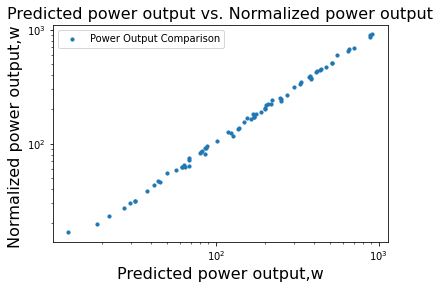

In [26]:
import matplotlib.pyplot as plt

plt.scatter(power,prepower,s=10, label='power output comparison')
plt.ylabel(r'data value power output,w ',fontsize = 16)
plt.xlabel(r'predicted power output,w',fontsize = 16)
plt.title('predicted power output vs. data value power output',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [19]:
test = []
outpt=[]

for i in range(len(Y_test)):
    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2],X_train[i][3] ]]
    testarray = np.array(test)
    print ('row [0] data:  M= ', X_train[i][0],',T1= ', X_train[i][1]*Tamed, ', gam= ', X_train[i][2]*IDmed, \
        ', qsol= ', X_train[i][3]*RLmed ,', voltage_to_load= ', Y_train[i][0]*VLmed,\
        ', power= ', Y_train[i][1]*Wdmed,',  test voltage_to_load = ', Y_test[i][0]*VLmed,\
           ', test power= ', Y_test[i][1]*Wdmed)

row [0] data:  M=  1.0 ,T1=  30.0 , gam=  200.0 , qsol=  170.1 , voltage_to_load=  84.50155 , power=  41.978318356275715 ,  test voltage_to_load =  44.162887500000004 , test power=  11.465964916775999
row [0] data:  M=  0.0 ,T1=  10.0 , gam=  200.0 , qsol=  96.2 , voltage_to_load=  46.0 , power=  22.0 ,  test voltage_to_load =  48.4 , test power=  54.3
row [0] data:  M=  0.0 ,T1=  10.0 , gam=  500.0 , qsol=  7.000000000000001 , voltage_to_load=  48.4 , power=  335.3 ,  test voltage_to_load =  23.128 , test power=  272.91040000000004
row [0] data:  M=  2.0 ,T1=  20.0 , gam=  1000.0 , qsol=  41.6 , voltage_to_load=  194.86305 , power=  912.7790445986176 ,  test voltage_to_load =  50.8 , test power=  62.0
row [0] data:  M=  1.0 ,T1=  10.0 , gam=  200.0 , qsol=  24.3 , voltage_to_load=  27.899999999999995 , power=  64.2 ,  test voltage_to_load =  93.21305 , test power=  742.6215974617521
row [0] data:  M=  0.0 ,T1=  20.0 , gam=  1000.0 , qsol=  11.7 , voltage_to_load=  48.7157625 , power= 

In [20]:
power2=[]
pre=[]
testpower=[]
test=[]
for i in range(len(X_test)):
    test = [[ X_test[i][0] , X_test[i][1] , X_test[i][2],X_test[i][3] ]]
    testarray = np.array(test)
    testpower = model.predict(testarray)
    power2.append(Y_test[i][1]*Wdmed)
    pre.append(testpower[0][1]*Wdmed)

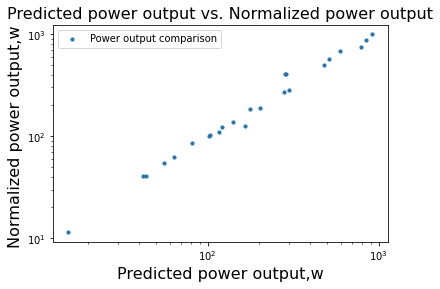

In [27]:
import matplotlib.pyplot as plt
plt.scatter(pre,power2,s=10, label='Power output comparison')
plt.ylabel(r'Normalized power output,w ',fontsize = 16)
plt.xlabel(r'Predicted power output,w',fontsize = 16)
plt.title('Predicted power output vs. Normalized power output',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [28]:
#M=0
test1 = []
outpt1=[]
X_train1 = [[0,10,200,50],[0,20,200,130],[0,10,50,40],[0,20,500,80],[0,20,700,30],[0,20,700,55],[0,10,1000,12],[0,20,1000,25],[0,20,1000,39]]
for i in range(len(X_train1)):
    test1 = [[ 0, X_train1[i][1]/Tamed , X_train1[i][2]/IDmed,X_train1[i][3]/RLmed ]]
    testarray1 = np.array(test1)
    outpt1 = model.predict(testarray1)
    print ( ' predicted power= ', outpt1[0][1]*Wdmed)

 predicted power=  43.75842404961586
 predicted power=  16.90036470890045
 predicted power=  56.91635538339615
 predicted power=  27.2767613530159
 predicted power=  79.32795036435128
 predicted power=  43.63541684150696
 predicted power=  232.0294964313507
 predicted power=  97.37618670463563
 predicted power=  62.72488209009171


In [ ]:
#M=1
test2 = []
outpt2=[]
X_train2 = [[1,10,200,50],[1,20,200,130],[1,10,50,40],[1,20,500,80],[1,20,700,30],[1,20,700,55],[1,10,1000,12],[1,20,1000,25],[1,20,1000,39]]
for i in range(len(X_train2)):
    test2 = [[ 0, X_train2[i][1]/Tamed , X_train2[i][2]/IDmed,X_train2[i][3]/RLmed ]]
    testarray2 = np.array(test2)
    outpt2 = model.predict(testarray2)
    print ( ' predicted power= ', outpt2[0][1]*Wdmed)

In [ ]:
#M=2
test3 = []
outpt3=[]
X_train3 = [[2,10,200,50],[2,20,200,130],[2,10,50,40],[2,20,500,80],[2,20,700,30],[2,20,700,55],[2,10,1000,12],[2,20,1000,25],[2,20,1000,39]]
for i in range(len(X_train3)):
    test3 = [[ 0, X_train3[i][1]/Tamed , X_train3[i][2]/IDmed,X_train3[i][3]/RLmed ]]
    testarray3 = np.array(test3)
    outpt3 = model.predict(testarray3)
    print ( ' predicted power= ', outpt3[0][1]*Wdmed)